# Regualrization
- 정규화 또는 규제라고 불림
- 머신러닝 모델이 훈련 데이터를 너무 과도하게 학습하지 못하도록 방해하는 것
- 모델이 과적합되지 않도록 만드는 것
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)를 작게 만드는 일
- 일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않음
    - 정규화(Normalization) 또는 표준화(Standardization)해야 함

In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

bts = pd.read_csv(r'AudioFeatures.csv', index_col=0)

bts.head()

,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883
2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593
3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360
4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160
5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453


In [160]:
from sklearn.model_selection import train_test_split

# X와 y 설정
# 입력 데이터와 타겟 데이터 분리
X = bts[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']]
y = bts['tempo']

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

훈련 데이터 크기: (117, 11)
테스트 데이터 크기: (30, 11)


- 사이킷런의 변환기를 이용해 특성을 만들거나 전처리하기 전에 다항식을 변형하여 다항 특성 추가하기
    - 모델 성능 향상을 위함
    - 효율적인 학습을 위함

In [161]:
# 모델이 입력 데이터의 비선형 관계를 학습하도록 도움
# 입력 데이터에 다항 특성을 추가하는 데 사용
from sklearn.preprocessing import PolynomialFeatures

X = bts[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']]

# 2차 다항식(입력 특성의 제곱 항목)과 모든 상호작용 항목을 포함
# 기본적으로 degree = 2, 2차 다항 특성을 생성
poly = PolynomialFeatures(degree=2, include_bias=False)

# X_train 데이터로 PolynomialFeatures를 fit 시킴
poly.fit(X_train)

# 다항 특성 이름 확인
feature_names = poly.get_feature_names_out(X.columns)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=feature_names)
X_test_poly = pd.DataFrame(poly.transform(X_test), columns=feature_names)

- 결과 해석
    - 입력 데이터의 각 특성에 대한 다항식 변환 결과
    - 각 행은 원본 데이터 포인트에 대한 다항식 변환 결과
    - 각 열은 변환된 다항 특성

In [162]:
X_train_poly.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,instrumentalness^2,instrumentalness liveness,instrumentalness valence,instrumentalness duration_ms,liveness^2,liveness valence,liveness duration_ms,valence^2,valence duration_ms,duration_ms^2
0,0.759,0.459,8.0,-5.187,1.0,0.0948,0.00323,0.0,0.0906,0.695,...,0.0,0.0,0.0,0.0,0.008208,0.062967,14898.4452,0.483025,114287.190,2.704117e+10
1,0.548,0.809,4.0,-4.533,1.0,0.1850,0.44000,0.0,0.1020,0.574,...,0.0,0.0,0.0,0.0,0.010404,0.058548,29027.8740,0.329476,163352.938,8.098976e+10
2,0.526,0.575,9.0,-5.215,0.0,0.0309,0.22500,0.0,0.1080,0.190,...,0.0,0.0,0.0,0.0,0.011664,0.020520,28246.6440,0.036100,49693.170,6.840474e+10
3,0.505,0.713,9.0,-4.710,1.0,0.3760,0.17400,0.0,0.4050,0.326,...,0.0,0.0,0.0,0.0,0.164025,0.132030,97129.9350,0.106276,78183.602,5.751699e+10
4,0.652,0.794,0.0,-6.604,1.0,0.0957,0.00808,0.0,0.2980,0.545,...,0.0,0.0,0.0,0.0,0.088804,0.162410,77912.9940,0.297025,142491.885,6.835767e+10


In [163]:
X_test_poly.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,instrumentalness^2,instrumentalness liveness,instrumentalness valence,instrumentalness duration_ms,liveness^2,liveness valence,liveness duration_ms,valence^2,valence duration_ms,duration_ms^2
0,0.758,0.598,0.0,-5.695,0.0,0.0868,0.1600,0.000000,0.295,0.658,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.087025,0.194110,54546.975,0.432964,121667.490,3.418986e+10
1,0.460,0.487,5.0,-6.586,0.0,0.0316,0.0190,0.000002,0.275,0.332,...,3.724900e-12,5.307500e-07,6.407600e-07,0.436514,0.075625,0.091300,62197.575,0.110224,75089.436,5.115423e+10
2,0.728,0.551,5.0,-5.375,0.0,0.0577,0.0674,0.000000,0.335,0.792,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.112225,0.265320,54248.225,0.627264,128252.520,2.622294e+10
3,0.612,0.822,11.0,-4.835,0.0,0.0812,0.0112,0.000000,0.102,0.165,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.010404,0.016830,26133.726,0.027225,42275.145,6.564510e+10
4,0.584,0.685,7.0,-7.811,1.0,0.4250,0.0304,0.000000,0.189,0.345,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.035721,0.065205,42774.669,0.119025,78080.745,5.122120e+10


In [164]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=feature_names)
X_test_scaled = pd.DataFrame(ss.transform(X_test_poly), columns=feature_names)

In [165]:
X_train_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,instrumentalness^2,instrumentalness liveness,instrumentalness valence,instrumentalness duration_ms,liveness^2,liveness valence,liveness duration_ms,valence^2,valence duration_ms,duration_ms^2
0,1.239577,-2.087045,0.725212,-0.253093,0.863868,-0.244872,-0.712939,-0.158922,-0.661282,0.830508,...,-0.116861,-0.161365,-0.169076,-0.164278,-0.428288,-0.442861,-0.864173,0.764862,-0.237235,-1.854585
1,-0.673371,0.322442,-0.383936,0.131752,0.863868,0.517664,2.249296,-0.158922,-0.587213,0.172451,...,-0.116861,-0.161365,-0.169076,-0.164278,-0.410373,-0.488394,-0.447831,0.007824,0.967481,1.720327
2,-0.872826,-1.288472,1.002499,-0.269570,-1.157584,-0.785073,0.791136,-0.158922,-0.548229,-1.915927,...,-0.116861,-0.161365,-0.169076,-0.164278,-0.400092,-0.880230,-0.470851,-1.438597,-1.823219,0.886378
3,-1.063214,-0.338446,1.002499,0.027597,0.863868,2.132348,0.445247,-0.158922,1.381473,-1.176293,...,-0.116861,-0.161365,-0.169076,-0.164278,0.843108,0.268757,1.558886,-1.092611,-1.123691,0.164900
4,0.269504,0.219178,-1.493084,-1.086924,0.863868,-0.237264,-0.680046,-0.158922,0.686260,0.014735,...,-0.116861,-0.161365,-0.169076,-0.164278,0.229337,0.581789,0.992633,-0.152168,0.455277,0.883259


In [166]:
X_test_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,instrumentalness^2,instrumentalness liveness,instrumentalness valence,instrumentalness duration_ms,liveness^2,liveness valence,liveness duration_ms,valence^2,valence duration_ms,duration_ms^2
0,1.230511,-1.130135,-1.493084,-0.552025,-1.157584,-0.312503,0.350297,-0.158922,0.666769,0.629284,...,-0.116861,-0.161365,-0.169076,-0.164278,0.214821,0.908422,0.304123,0.518048,-0.056026,-1.380876
1,-1.471189,-1.894286,-0.106649,-1.076332,-1.157584,-0.779155,-0.605985,-0.152421,0.536822,-1.143662,...,-0.116856,-0.144132,-0.163699,-0.157008,0.121802,-0.150921,0.529558,-1.073146,-1.199662,-0.256729
2,0.958527,-1.453694,-0.106649,-0.363721,-1.157584,-0.558510,-0.277729,-0.158922,0.926661,1.358041,...,-0.116861,-0.161365,-0.169076,-0.164278,0.420442,1.642162,0.295320,1.475998,0.105657,-1.908804
3,-0.093141,0.411937,1.557073,-0.045959,-1.157584,-0.359845,-0.658886,-0.158922,-0.587213,-2.051889,...,-0.116861,-0.161365,-0.169076,-0.164278,-0.410373,-0.918251,-0.533111,-1.482353,-2.005355,0.703511
4,-0.346992,-0.531205,0.447925,-1.797181,0.863868,2.546586,-0.528668,-0.158922,-0.021946,-1.072962,...,-0.116861,-0.161365,-0.169076,-0.164278,-0.203797,-0.419801,-0.042764,-1.029755,-1.126216,-0.252292


- PolynomialFeature 클래스로 객체 훈련을 마침
- 이후, 훈련 데이터로 학습한 변환기를 사용해 테스트 데이터까지 변환

# 릿지 Ridge / 라쏘 Lasso
- 선형 회귀 모델에 규제를 추가한 모델
- 계수의 크기를 줄이는데 사용
## 릿지 Ridge
- 계수를 제곱한 값을 기준으로 규제 적용
- 일반적으로 선호

In [147]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 모델 훈련
# alpha는 정규화 강도를 조절하는 하이퍼파라미터
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# 예측
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

# 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# 계수 확인 (특성의 중요도)
print(f"Ridge coefficients: {ridge.coef_}")
print("Train R-Squared : ", ridge.score(X_train_scaled, y_train))
print("Test R-Squared : ", ridge.score(X_test_scaled, y_test))

Train MSE: 0.00
Test MSE: 0.01
Ridge coefficients: [-0.01537512 -0.00882473  0.02236225  0.05313523  0.04708069 -0.00653682
  0.01961369  0.02928195  0.02510158  0.02194974  0.02579892 -0.02359679
 -0.03171014  0.07560206 -0.04758569  0.03151948 -0.00429275  0.00504132
  0.0118233  -0.02439022  0.01532182  0.07247841 -0.00300527 -0.00937903
 -0.03414412 -0.02333487 -0.00027979  0.00551832  0.01043505 -0.00402609
  0.03677383  0.0330783  -0.01167111  0.01760979 -0.02088692  0.03927329
  0.0054325  -0.02369484 -0.01875372 -0.00549241 -0.00175178  0.05313523
 -0.02824629  0.00990581  0.00746976 -0.02575439 -0.0069989   0.01229276
  0.00145023 -0.00853604  0.00345173  0.0004187   0.00424961 -0.03306957
 -0.03149642  0.03838697  0.03805681 -0.01533781 -0.03423488 -0.00806113
  0.00559614 -0.02089013 -0.02267209 -0.00076435 -0.03444295  0.03336144
  0.01242111  0.01220121 -0.02330467 -0.02091452  0.00307174 -0.00940929
  0.03683149  0.0186548  -0.02654945 -0.03792214 -0.05045375]
Train R-Squ

### 결과 해석
- Train MSE: 0.00
    - 훈련 데이터에 대한 평균 제곱 오차
    - 모델이 훈련 데이터에 대해 예측한 값과 실제 값의 차이를 제곱하여 평균
    - 낮을 수록 모델이 훈련 데이터 잘 맞춰졌음을 의미
- Test MSE: 0.01
    - 테스트 데이터에 대한 평균 제곱 오차
    - 모델의 일반화 성능을 평가하는 지표
    - 테스트 데이터에 대한 예측 정확도
    - 훈련 MSE보다 높은 테스트 MSE는 모델이 테스트 데이터에 대해 과적합되지 않았음을 의미
- Ridge coefficients
    - 각 특성에 대한 Ridge 회귀 모델 계수
    - 각 특성이 모델 예측에 미치는 영향
    - Ridge는 규제를 통해 계수를 작게 만들어 과적합 방지
    - 계수가 0에 가까울 수록 특성은 모델에서 덜 중요하거나 영향이 적음을 의미
- Train R-Squared :  0.8836103820372765
    - 모델 결정 계수
    - 모델이 테스트 데이터의 변동성을 약 88% 설명할 수 있음
    - 모델의 예측이 실제 데이터에 얼마나 잘 맞는지 측정하는 지표
    - 1에 가까울 수록 좋음
- Test R-Squared :  0.427025259696342
    - 모델이 테스트 데이터의 약 42.70%의 분산을 설명하고 있다는 의미
    - 모델이 테스트 데이터에 대한 성능이 상대적으로 낮음
- 훈련 데이터에 비해 테스트 데이터에서 성능이 낮음
    - 이는 모델이 훈련 데이터에 대해 과적합(overfitting)된 것으로 추측
    
### 규제의 역할
- alpha = 1에서 훈련 데이터에 비해 테스트 데이터에서 성능이 낮다는 것은, 이 값이 모델의 복잡도를 적절히 조절하지 못하고 있다는 것을 의미
- 규제 강도를 증가시키면 모델의 복잡도가 줄어들어 과적합을 줄일 수 있지만, 너무 강한 규제는 모델의 성능을 전체적으로 떨어뜨릴 수 있음

### alpha 값
- 모델 객체를 만들 때 규제의 강도를 조절하는 매개변수
- alpha 값이 크면, 규제 강도가 세지면서 계수 값이 줄어 들고, 조금 더 과소적합을 유도
- alpha 값이 작으면, 규제 강도가 약해지면서 계수 줄이는 역할이 줄어들어 선형 회귀 모델과 유사해져서 과대적합될 가능성이 있음



alpha 값을 늘려가면서 릿지 회귀 모델을 훈련한 다음 훈련 데이터와 테스트 데이터의 점수를 그래프로 그려보겠음

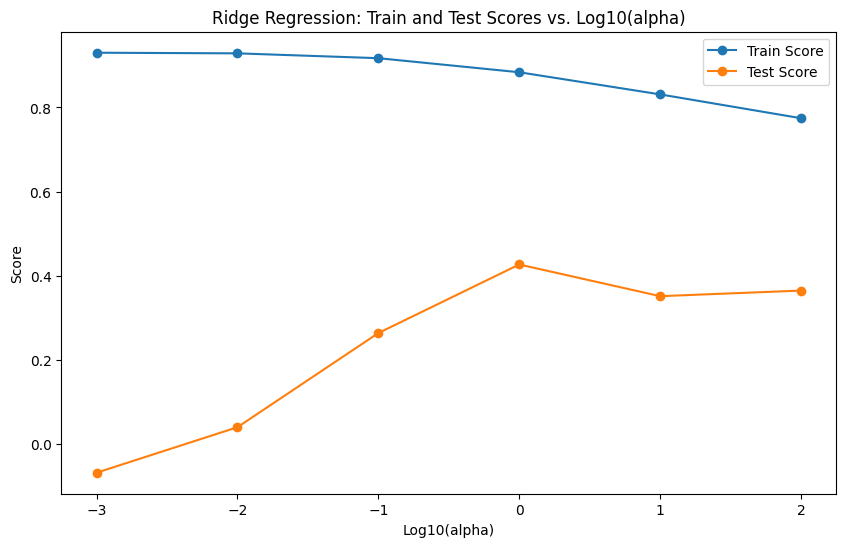

In [149]:
import matplotlib.pyplot as plt
import numpy as np

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_score.append(ridge.score(X_train_scaled, y_train))
    test_score.append(ridge.score(X_test_scaled, y_test))

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(np.log10(alpha_list), train_score, marker='o', label='Train Score')
plt.plot(np.log10(alpha_list), test_score, marker='o', label='Test Score')

# 그래프 제목과 축 레이블 추가
plt.title('Ridge Regression: Train and Test Scores vs. Log10(alpha)')
plt.xlabel('Log10(alpha)')
plt.ylabel('Score')
plt.legend()

# 그래프 출력
plt.show()

### 결과 해석
- 그래프 좌측은 훈련 데이터에 과적합되었다고 판단됨
    - 훈련 데이터에서 높은 점수를 보여주고, 반대로 테스트 데이터에서 낮은 점수이기 때문
- 그래프 우측으로 갈수록 두 그래프의 점수 차이가 적어지기는 하나 훈련 데이터에서 감소하고 있음
    - 모델이 너무 단순해서 데이터의 복잡성을 잘 설명하지 못하는 것 같음
    - 즉, 과소적합. alpha 값이 너무 커서 규제가 과도하여 모델의 성능이 저하된 상태
- 적절한 alpha=1로 예상 됨

## 라쏘 Lasso
- 계수의 절댓값을 기준으로 규제 적용
- 계수를 0으로 만들 수 있음

In [167]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
print('Train R-Squared : ',lasso.score(X_train_scaled, y_train))
print('Test R-Squared : ',lasso.score(X_test_scaled, y_test))

Train R-Squared :  0.29455698353340376
Test R-Squared :  -0.23068215747645726


 모델이 데이터에 적합하지 않거나, Lasso 회귀의 강한 규제 효과로 인해 성능이 매우 저조할 것으로 예상 됨

c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+04, tolerance: 8.036e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+04, tolerance: 8.036e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

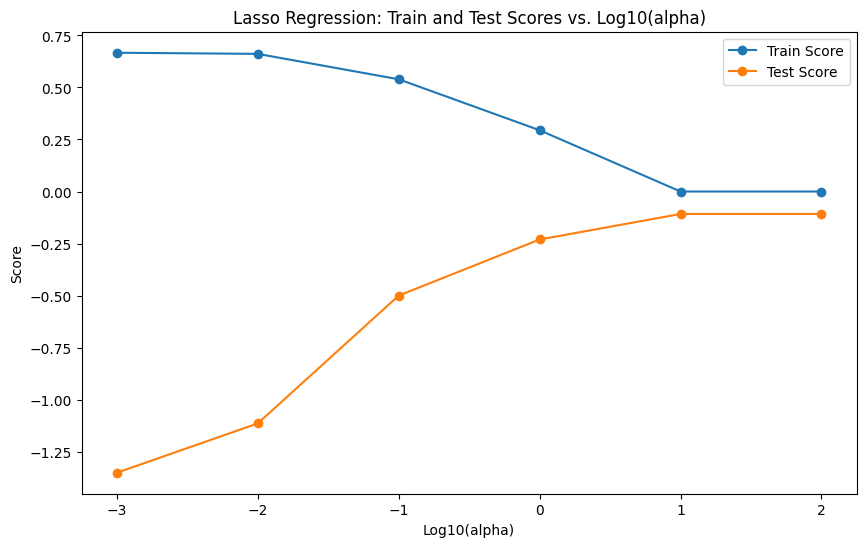

In [168]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    train_score.append(lasso.score(X_train_scaled, y_train))
    test_score.append(lasso.score(X_test_scaled, y_test))

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(np.log10(alpha_list), train_score, marker='o', label='Train Score')
plt.plot(np.log10(alpha_list), test_score, marker='o', label='Test Score')

# 그래프 제목과 축 레이블 추가
plt.title('Lasso Regression: Train and Test Scores vs. Log10(alpha)')
plt.xlabel('Log10(alpha)')
plt.ylabel('Score')
plt.legend()

# 그래프 출력
plt.show()

### 결과 해석
- 그래프 좌측에서는 훈련 데이터에서 높은 점수를 보여주고, 두 그래프 간의 차이가 큼
    - 훈련 데이터게 과적합된 것으로 판단 됨
    - 과적합된 모델은 테스트 데이터에 대한 일반화 성능이 저하
- 테스트 점수가 점점 증가하더니 alpha=10 일때부터 그래프가 가까워짐
    - alpha 값이 커지면서 훈련 점수가 감소하는 것은 모델의 복잡도가 줄어들어 과적합을 줄이고 있다고 해석되며, 테스트 점수가 증가하는 것은 모델이 테스트 데이터에 잘 적응하고 있다고 판단됨
    - 규제가 증가하면서 모델이 성능이 개선되어 잘 일반화 되었다고 판단

In [173]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
print('Train R-Squared : ',lasso.score(X_train_scaled, y_train))
print('Test R-Squared : ',lasso.score(X_test_scaled, y_test))

Train R-Squared :  0.539478196071462
Test R-Squared :  -0.5003467752906348


c:\Users\utw09\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.517e+01, tolerance: 8.036e+00
  model = cd_fast.enet_coordinate_descent(


모델이 데이터에 부적절한 듯

In [174]:
np.sum(lasso.coef_ == 0)

36

- 라쏘는 계수 값을 0으로 만들수 있음을 기억하기
- 전체 특성 중 36개를 특성 계수 0으로 설정
    - 일부 특성 계수를 0으로 만들어 모델이 특정 특성을 무시하도록 함
    - 모델의 복잡성을 줄이고, 과적합을 방지
    - 유용한 특성을 골라내는 용도로 사용할 수 있음
- 이 모델의 경우 36개의 특성을 무시하여 차원 축소와 과적합 방지에 도움을 줌